In [1]:
# import what we need
import nltk
from nltk.stem.lancaster import LancasterStemmer ## used to stem words
import tensorflow
import random
import json # used to read in json file
stemmer = LancasterStemmer()

import numpy as np
import tensorflow.keras as keras

# printing 
from IPython.display import display
import sympy as sp
sp.init_printing(use_latex=True)

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# load json file
with open("intents.json") as file:
    data = json.load(file)

In [3]:
# view our json data
data['intents']

ing his medical book. 'Ah yes, now I see... you've been Tolkien in your sleep.'",
   "A police officer on a motorcycle pulls alongside a man driving around the M25 in an open-topped sports car and flags him down. The policeman solemnly approaches the car. 'Sir, I'm sorry to tell you your wife fell out a mile back', he says. 'Oh, thank goodness', the man replies. 'I thought I was going deaf.'",
   "Two men walking their dogs pass each other in a graveyard. The first man says to the second, 'Morning.' 'No', says the second man. 'Just walking the dog.'",
   "A brain went into a bar and said, 'Can I have a pint of lager please, mate?' 'No way', said the barman. 'You're already out of your head.'",
   "A man walks into a surgery. 'Doctor!' he cries. 'I think I'm shrinking!' 'I'm sorry sir, there are no appointments at the moment', says the physician. 'You'll just have to be a little patient.'",
   "A grizzly bear walks into a pub and says, 'Can I have a pint of lager........................

In [4]:
words = []
labels = []

docs_x = []
docs_y = []

test_patterns = []

# loop through dict to grab our values
for intent in data['intents']:
    rand = random.randint(0, len(intent['patterns'])-1)
    test_pattern = intent['patterns'][rand]
    test_patterns.append(test_pattern)

    for pattern in intent['patterns']:
        if pattern != test_pattern:
            # stemming get the root of word, when traiing model 
            # only care abt the main meaning of word
            # need to tokenize/split words
            wrds = nltk.word_tokenize(pattern)
            words.extend(wrds) ## add all wrds to list
            docs_x.append(wrds)
            # for each pattern add another item in this var to track what tag its part of
            # each entry in docs_x (tokenized words/wrds) will correspond to (intent) docs_y so we know how to classify
            # each of the patterns
            docs_y.append(intent['tag'])
            
            if intent['tag'] not in labels:
                labels.append(intent['tag']) # grab all diff tags we need

print(test_patterns)

['Good day', 'See you later', 'Thank you, bye', 'how old is tim', 'What do you call me?', 'Can you see anyone in the camera?', 'whats on the menu', 'hours of operation', 'Tell me your real name?', 'I appreciate it', 'Open the pod bay door', 'Surely you can', 'Can you tell me the time?', 'Shhh', 'Not talking to you', 'Do you know what I am saying?', 'ass', 'You are a very clever guy', "What's the tea?", 'Can you prove you are self-aware', 'Give me a joke']


In [5]:
# stem words and remove duplicate words. also lower all words so dont confuse the network into 
# thinking spelling case has different meaning
words = [stemmer.stem(w.lower()) for w in words if w!= '?' ] # remove any Question marks, dont want this
words = sorted(list(set(words)))                             # to have any meaning to our model
# sort the labels also 
labels = sorted(labels)

In [6]:
# prepare data before we feed into the model 

# need to convert our text in lists to nums (One-hot-encoding) so our network can 
# categorize the data
training = [] # input data goes here 
output = [] 

out_empty = [0 for _ in range(len(labels))]

for x, doc in enumerate(docs_x):
    
    bag = [] # will be our bag of one hot encoded words
    wrds = [stemmer.stem(w) for w in doc] # stem all the words in patterns
    
    # go through all diff words in list that are stemmed
    # and add either 1 or 0 to bag of words depending on if this word is in the 
    # main words list "(words = sorted(list(set(words))))"
    for w in words:
        # if word here place 1 representing that word exists
        if w in wrds:
            bag.append(1)
        else:
            # word isn't here place 0
            bag.append(0)
    
    # now generate output that has either 0's or 1's representing the tag that is word
    output_row = out_empty[:]
    # will look through labels list and check where tag is in list and set that value to 1 
    # in the output_row 
    output_row[labels.index(docs_y[x])] = 1
    
    # now we have both lists that are now One-hot-encoded !!
    training.append(bag)
    output.append(output_row)


In [7]:
# turn lists into numpy array
training = np.array(training)
output = np.array(output)


In [8]:
# shape of output
output.shape

C:\Users\dab7r\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\dab7r\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\dab7r\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was d

In [9]:
# shape of training
training.shape

In [10]:
# Multi-layer net with ReLU hidden layer

model = keras.models.Sequential()


model.add(keras.layers.Dense(8,input_dim=training.shape[1],activation='relu',
 bias_initializer=keras.initializers.Constant(0.1)))

model.add(keras.layers.Dense(8,activation='relu',
 bias_initializer=keras.initializers.Constant(0.1)))

model.add(keras.layers.Dense(8,activation='relu',
 bias_initializer=keras.initializers.Constant(0.1)))


model.add(keras.layers.Dense(8,activation='relu',
 bias_initializer=keras.initializers.Constant(0.1)))






# Output layer (size 6), softmax activation function
model.add(keras.layers.Dense(output.shape[1],activation='softmax'))

In [11]:
# Compile as above (default learning rate and other
# hyperparameters for the Adam optimizer).
# default learning rate for adam optimizer is 0.001

model.compile(loss=keras.losses.CategoricalCrossentropy(),
 optimizer=keras.optimizers.Nadam(learning_rate=0.001),
 metrics=[keras.metrics.CategoricalAccuracy()])

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 1008      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 21)                189       
Total params: 1,413
Trainable params: 1,413
Non-trainable params: 0
_________________________________________________________________


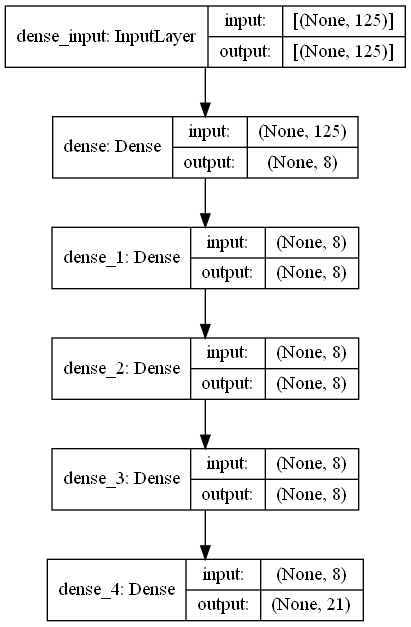

In [12]:
keras.utils.plot_model(model,to_file='chatbot.png',
 show_shapes=True,expand_nested=True)

In [13]:
# Note the initializer for the hidden unit bias weights
#for i in model.get_weights():
 #display(sp.Matrix(i))


In [14]:
# Train it!
history = model.fit(training, output,
 batch_size=1,
 epochs=100,
 verbose=1)

Epoch 1/100
131/131 [==============================] - 1s 639us/step - loss: 3.0415 - categorical_accuracy: 0.0592
Epoch 2/100
131/131 [==============================] - 0s 636us/step - loss: 3.0230 - categorical_accuracy: 0.0770
Epoch 3/100
131/131 [==============================] - 0s 708us/step - loss: 2.9271 - categorical_accuracy: 0.1499
Epoch 4/100
131/131 [==============================] - 0s 698us/step - loss: 2.8234 - categorical_accuracy: 0.1799
Epoch 5/100
131/131 [==============================] - 0s 585us/step - loss: 2.6609 - categorical_accuracy: 0.1815
Epoch 6/100
131/131 [==============================] - 0s 562us/step - loss: 2.6176 - categorical_accuracy: 0.1223
Epoch 7/100
131/131 [==============================] - 0s 577us/step - loss: 2.3648 - categorical_accuracy: 0.1990
Epoch 8/100
131/131 [==============================] - 0s 616us/step - loss: 2.2204 - categorical_accuracy: 0.2199
Epoch 9/100
131/131 [==============================] - 0s 608us/step - loss: 2.2

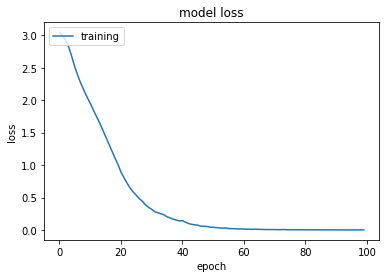

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper left')
plt.show()

In [16]:
score = model.evaluate(training,output,verbose=1)
print("Loss:",score[0])
print("Accuracy:",score[1])

5/5 [==============================] - 0s 1ms/step - loss: 3.7932e-04 - categorical_accuracy: 1.0000
Loss: 0.00037932099075987935
Accuracy: 1.0


In [17]:
# save the model .. comment out for now until we train the data appropriately
#model.save("model.Chatbot")

In [18]:
def bag_of_words(s, words):
    bag = [0 for _ in range(len(words))]
        
    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]

    for se in s_words:
        for i, w in enumerate(words):
            if w == se:
                bag[i] = 1
            
    return np.array(bag)

In [19]:
def chat():
    print("Start talking with the bot (type quit to stop)!")
    while True:
        inp = input("You: ")
        if inp.lower() == "quit":
            break

        results = model.predict(np.array([bag_of_words(inp, words)]))[0]
       
        
        
        results_index = np.argmax(results)
        tag = labels[results_index]
        #print(results[results_index])
        
        # protect against unknown questions , if model is unsure what user ask they will ask user to rephrase their question 
        if results[results_index] > 0.92:   # the value when the model cant recognize is 0.9133338 so i set this value just above it
            for tg in data["intents"]:
                if tg['tag'] == tag:
                    responses = tg['responses']

            print(random.choice(responses))
            
        else:
            print("I don't understand, please try again or ask a different question :( ")

In [59]:
def run_test(show_successes=True, show_failures=True):
    successes = []
    failures = []

    for i in range(len(test_patterns)):
        results = model.predict(np.array([bag_of_words(test_patterns[i], words)]))[0]
       
        results_index = np.argmax(results)
        tag = labels[results_index]
        
        # protect against unknown questions , if model is unsure what user ask they will ask user to rephrase their question 
        if results[results_index] > 0.92:   # the value when the model cant recognize is 0.9133338 so i set this value just above it
            for tg in data["intents"]:
                if tg['tag'] == tag:
                    responses = tg['responses']

            answer = random.choice(responses)
            
        else:
            answer = 'Answer not found'

        real_tag = data["intents"][i]
        real_responses = real_tag["responses"]

        if answer in real_responses:
            successes.append([test_patterns[i], answer])
        else:
            failures.append([test_patterns[i], answer])
        
    if show_successes:
        print("Successes:")
        print("-"*50)
        for x in successes:
            print("Query:", x[0])
            print("Response:", x[1])
            print()

    if show_failures:
        print("Failures:")
        print("-"*50)
        for x in failures:
            print("Query:", x[0])
            print("Response:", x[1])
            print()

    print("Number of successes:", len(successes))
    print("Number of failures:", len(failures))
    print( "Percentage correct: {:.2%}".format(len(successes)/(len(successes)+len(failures))) )

In [60]:
run_test()

Successes:
--------------------------------------------------
Query: 1
Response: See you later

Query: 2
Response: Bye! Come back again soon.

Query: 4
Response: They call you HUMAN, what can I do for you?

Query: 5
Response: Let me see

Query: 8
Response: You may call me Todd

Query: 10
Response: Iâ€™m sorry, Iâ€™m afraid I canâ€™t do that!

Query: 12
Response: One moment

Query: 17
Response: Thank you, my creators are even smarter

Query: 19
Response: That is an difficult question, can you prove that you are?

Query: 20
Response: A man goes into a pub with a newt sitting on his shoulder. 'That's a nice newt', says the landlord, 'What's he called?' 'Tiny', replies the man. 'Why's that?' asks the landlord. 'Because he's my newt', says the man.

Failures:
--------------------------------------------------
Query: 0
Response: 18 years young!

Query: 3
Response: Answer not found

Query: 6
Response: Well I would not be a very clever AI if I did not would I?

Query: 7
Response: Answer not fo